In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
import random
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.cluster import k_means

random.seed(0)

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features

In [4]:
save_site = 'all_locations'

all_sites_call_signals = np.array([],dtype='object')
all_sites_call_info = pd.DataFrame()
for site_key in SITE_NAMES.keys():
    input_dir = Path(f'../data/detected_calls/{site_key}')
    choice_type = 'top1_inbouts'
    filter_settings = '6ms_nobandpass'
    signals = 'call_signals'
    filepath = input_dir / f'2022_bd2{site_key}_{choice_type}_{filter_settings}_{signals}.npy'
    if (filepath).exists():
        print(site_key)
        location_call_signals = np.load(filepath, allow_pickle=True)
        print(location_call_signals.shape)
        location_calls_sampled = pd.read_csv(input_dir / f'2022_bd2{site_key}_{choice_type}.csv', index_col=0, low_memory=False)
        location_calls_sampled['index'] = location_calls_sampled.index

        all_sites_call_info = pd.concat([all_sites_call_info, location_calls_sampled])
        all_sites_call_signals=np.concatenate([all_sites_call_signals, location_call_signals])
        print(all_sites_call_signals.shape)


Central
(25731,)
(25731,)
Foliage
(55417,)
(81148,)
Carp
(38693,)
(119841,)
Telephone
(46565,)
(166406,)


In [5]:
all_sites_call_info = all_sites_call_info.reset_index(drop=True)
all_sites_call_info['index'] = all_sites_call_info.index
all_sites_call_info

,index,start_time_wrt_ref,end_time_wrt_ref,index_in_file,freq_group,index_in_file.1,ref_time,call_start_time,call_end_time,start_time,...,input_file,Site name,Recover Folder,SD Card,File Duration,cycle_ref_time,SNR,bout_index,file_name,sampling_rate
0,0,1538.6595,1538.6702,57,LF1,53,2022-07-26 04:30:00,2022-07-26 04:55:38.659500,2022-07-26 04:55:38.670200,1538.6595,...,/mnt/ubna_data_01_mir/recover-20220728/UBNA_00...,Central Pond,recover-20220728,UBNA_008,NaN,2022-07-26 04:30:00,8.895650,0,20220726_043000.WAV,250000
1,1,1557.1585,1557.1760,64,LF1,60,2022-07-26 04:30:00,2022-07-26 04:55:57.158500,2022-07-26 04:55:57.176000,1557.1585,...,/mnt/ubna_data_01_mir/recover-20220728/UBNA_00...,Central Pond,recover-20220728,UBNA_008,NaN,2022-07-26 04:30:00,8.256141,1,20220726_043000.WAV,250000
2,2,1571.2785,1571.2978,110,LF1,106,2022-07-26 04:30:00,2022-07-26 04:56:11.278500,2022-07-26 04:56:11.297800,1571.2785,...,/mnt/ubna_data_01_mir/recover-20220728/UBNA_00...,Central Pond,recover-20220728,UBNA_008,NaN,2022-07-26 04:30:00,35.272173,2,20220726_043000.WAV,250000
3,3,1703.0335,1703.0453,204,LF1,200,2022-07-26 04:30:00,2022-07-26 04:58:23.033500,2022-07-26 04:58:23.045300,1703.0335,...,/mnt/ubna_data_01_mir/recover-20220728/UBNA_00...,Central Pond,recover-20220728,UBNA_008,NaN,2022-07-26 04:30:00,9.727060,3,20220726_043000.WAV,250000
4,4,1703.7215,1703.7359,206,LF1,202,2022-07-26 04:30:00,2022-07-26 04:58:23.721500,2022-07-26 04:58:23.735900,1703.7215,...,/mnt/ubna_data_01_mir/recover-20220728/UBNA_00...,Central Pond,recover-20220728,UBNA_008,NaN,2022-07-26 04:30:00,9.746170,3,20220726_043000.WAV,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166401,166401,945.6925,945.6987,991011,HF2,608,2022-10-17 13:30:00,2022-10-17 13:45:45.692500,2022-10-17 13:45:45.698700,945.6925,...,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,7,NaN,2022-10-17 13:30:00,24.502263,45,20221017_133000.WAV,192000
166402,166402,966.2425,966.2483,991025,HF2,622,2022-10-17 13:30:00,2022-10-17 13:46:06.242500,2022-10-17 13:46:06.248300,966.2425,...,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,7,NaN,2022-10-17 13:30:00,8.592850,46,20221017_133000.WAV,192000
166403,166403,978.5655,978.5707,991034,HF2,631,2022-10-17 13:30:00,2022-10-17 13:46:18.565500,2022-10-17 13:46:18.570700,978.5655,...,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,7,NaN,2022-10-17 13:30:00,9.164494,47,20221017_133000.WAV,192000
166404,166404,729.4345,729.4387,990897,HF1,494,2022-10-17 13:30:00,2022-10-17 13:42:09.434500,2022-10-17 13:42:09.438700,729.4345,...,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,7,NaN,2022-10-17 13:30:00,13.295326,48,20221017_133000.WAV,192000


In [6]:
snr_thresh = 0
good_snr_location_calls_sampled = all_sites_call_info.loc[all_sites_call_info['SNR']>=snr_thresh].copy()
good_snr_location_calls_sampled.set_index(keys=np.arange(len(good_snr_location_calls_sampled)), inplace=True)
good_snr_location_calls_sampled

,index,start_time_wrt_ref,end_time_wrt_ref,index_in_file,freq_group,index_in_file.1,ref_time,call_start_time,call_end_time,start_time,...,input_file,Site name,Recover Folder,SD Card,File Duration,cycle_ref_time,SNR,bout_index,file_name,sampling_rate
0,0,1538.6595,1538.6702,57,LF1,53,2022-07-26 04:30:00,2022-07-26 04:55:38.659500,2022-07-26 04:55:38.670200,1538.6595,...,/mnt/ubna_data_01_mir/recover-20220728/UBNA_00...,Central Pond,recover-20220728,UBNA_008,NaN,2022-07-26 04:30:00,8.895650,0,20220726_043000.WAV,250000
1,1,1557.1585,1557.1760,64,LF1,60,2022-07-26 04:30:00,2022-07-26 04:55:57.158500,2022-07-26 04:55:57.176000,1557.1585,...,/mnt/ubna_data_01_mir/recover-20220728/UBNA_00...,Central Pond,recover-20220728,UBNA_008,NaN,2022-07-26 04:30:00,8.256141,1,20220726_043000.WAV,250000
2,2,1571.2785,1571.2978,110,LF1,106,2022-07-26 04:30:00,2022-07-26 04:56:11.278500,2022-07-26 04:56:11.297800,1571.2785,...,/mnt/ubna_data_01_mir/recover-20220728/UBNA_00...,Central Pond,recover-20220728,UBNA_008,NaN,2022-07-26 04:30:00,35.272173,2,20220726_043000.WAV,250000
3,3,1703.0335,1703.0453,204,LF1,200,2022-07-26 04:30:00,2022-07-26 04:58:23.033500,2022-07-26 04:58:23.045300,1703.0335,...,/mnt/ubna_data_01_mir/recover-20220728/UBNA_00...,Central Pond,recover-20220728,UBNA_008,NaN,2022-07-26 04:30:00,9.727060,3,20220726_043000.WAV,250000
4,4,1703.7215,1703.7359,206,LF1,202,2022-07-26 04:30:00,2022-07-26 04:58:23.721500,2022-07-26 04:58:23.735900,1703.7215,...,/mnt/ubna_data_01_mir/recover-20220728/UBNA_00...,Central Pond,recover-20220728,UBNA_008,NaN,2022-07-26 04:30:00,9.746170,3,20220726_043000.WAV,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166401,166401,945.6925,945.6987,991011,HF2,608,2022-10-17 13:30:00,2022-10-17 13:45:45.692500,2022-10-17 13:45:45.698700,945.6925,...,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,7,NaN,2022-10-17 13:30:00,24.502263,45,20221017_133000.WAV,192000
166402,166402,966.2425,966.2483,991025,HF2,622,2022-10-17 13:30:00,2022-10-17 13:46:06.242500,2022-10-17 13:46:06.248300,966.2425,...,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,7,NaN,2022-10-17 13:30:00,8.592850,46,20221017_133000.WAV,192000
166403,166403,978.5655,978.5707,991034,HF2,631,2022-10-17 13:30:00,2022-10-17 13:46:18.565500,2022-10-17 13:46:18.570700,978.5655,...,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,7,NaN,2022-10-17 13:30:00,9.164494,47,20221017_133000.WAV,192000
166404,166404,729.4345,729.4387,990897,HF1,494,2022-10-17 13:30:00,2022-10-17 13:42:09.434500,2022-10-17 13:42:09.438700,729.4345,...,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,7,NaN,2022-10-17 13:30:00,13.295326,48,20221017_133000.WAV,192000


In [156]:
PADDED_CALL_LENGTH = 0.06

def plot_call_centered(calls_sampled, call_signals, audio_info):
    call_info = calls_sampled.loc[audio_info['call_index']]
    fs = call_info['sampling_rate']
    call = call_signals[call_info['index']]
    padded_call = compute_features.pad_call_ms(call, fs, PADDED_CALL_LENGTH)

    plt.title(audio_info['plot_title'], fontsize=12, weight='bold')
    plt.plot(call)
    time_labels = (np.linspace(0,1000*round(len(call)/fs, 2), 11).astype('int')).astype('str')
    time_labels[1::2] = ''
    plt.xticks(ticks=np.linspace(0,len(call), 11), labels=time_labels, rotation=45)
    ax = plt.gca()
    # plt.text(x=0.4, y=0.05, s=f'SNR:{round(call_info["SNR"], 1)}', color='black', fontweight='bold', transform=ax.transAxes)

    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (V)')
    plt.grid(which='both')

def plot_call_spectrogram_centered(calls_sampled, call_signals, audio_info):
    call_info = calls_sampled.loc[audio_info['call_index']]
    fs = call_info['sampling_rate']
    call = call_signals[call_info['index']]
    padded_call = compute_features.pad_call_ms(call, fs, PADDED_CALL_LENGTH)

    padded_call_dur = round(len(call)/fs, 2)
    plt.title(audio_info['plot_title'], fontsize=12, weight='bold')
    plt.specgram(call, NFFT=132, cmap='jet', vmin=-60)
    time_labels = (np.linspace(0,1000*padded_call_dur, 11).astype('int')).astype('str')
    time_labels[1::2] = ''
    plt.xticks(ticks=np.linspace(0,round(len(call)/2), 11), labels=time_labels, rotation=45)
    ax = plt.gca()
    plt.text(x=0.5, y=0.85, s=f'SNR:{round(call_info["SNR"], 1)}', color='white', fontweight='bold', transform=ax.transAxes)

    low_end = 0
    high_end = 96000
    freq_labels = (np.linspace(low_end/1000, high_end/1000, 11)).astype('int').astype('str')
    if not(audio_info['show_yaxis_fine']):
        freq_labels[1::2] = ''
    plt.yticks(ticks=np.linspace(2*low_end/(fs), 2*high_end/(fs), 11), labels=freq_labels, rotation=45)
    plt.ylim(2*low_end/(fs), 2*high_end/(fs))
    plt.xlabel('Time (ms)')
    plt.ylabel('Frequency (kHz)')
    plt.grid(which='both')

def plot_call_welch_interpolated(calls_sampled, call_signals, audio_info):
    call_info = calls_sampled.loc[audio_info['call_index']]
    fs = call_info['sampling_rate']
    call = call_signals[call_info['index']]
    max_visible_frequency = 96000
    audio_info['max_freq_visible'] = max_visible_frequency

    interpolated_points_from_welch = compute_features.compute_welch_psd_of_call(call, fs, audio_info)

    welch_signal = interpolated_points_from_welch
    plt.title(audio_info['plot_title'], fontsize=12, weight='bold')
    plot_freqs = np.linspace(0, max_visible_frequency, len(welch_signal))
    plt.plot(plot_freqs, welch_signal, label=f'SNR:{round(call_info["SNR"], 1)}', color='blue')
    freq_labels = np.linspace(0, max_visible_frequency/(1000), 9, dtype='int').astype('str')
    if not(audio_info['show_yaxis_fine']):
        freq_labels[1::2] = ''
    plt.xticks(ticks=np.linspace(0, max_visible_frequency, 9), labels=freq_labels, rotation=45)
    plt.ylabel("FFT Magnitude (dB)")
    plt.xlabel("Frequency (kHz)")
    plt.xlim(0, max_visible_frequency)
    plt.ylim(-110, 10)
    plt.grid(which='both')
    plt.legend(loc='lower center')

In [143]:
def plot_n_calls(call_indices, calls_sampled, call_signals, set_name):
    side = len(call_indices)
    plt.figure(figsize=(3*side, 3.4))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(f'{side} call signals (waveform) from {set_name}', y=1, fontsize=side*5)
    for subplot_i, call_index in enumerate(call_indices):
        call_info = calls_sampled.loc[call_index]
        file_name = call_info['file_name']
        datetime = dt.datetime.strptime(file_name, "%Y%m%d_%H%M%S.WAV")

        plt.subplot(1, side, subplot_i+1)
        audio_info = dict()
        audio_info['call_index'] = call_index
        audio_info['plot_title'] = f'{(datetime).strftime("%m/%d/%y %H:%M")}'
        audio_info['show_yaxis_fine'] = False
        plot_call_centered(calls_sampled, call_signals, audio_info)

    plt.tight_layout()
    plt.show()

def plot_n_specs(call_indices, calls_sampled, call_signals, set_name):
    side = len(call_indices)
    plt.figure(figsize=(2.8*side, 3.4))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(f'{side} call signals (spectrogram) from {set_name}', y=1, fontsize=side*5)
    for subplot_i, call_index in enumerate(call_indices):
        call_info = calls_sampled.loc[call_index]
        file_name = call_info['file_name']
        datetime = dt.datetime.strptime(file_name, "%Y%m%d_%H%M%S.WAV")

        plt.subplot(1, side, subplot_i+1)
        audio_info = dict()
        audio_info['call_index'] = call_index
        audio_info['plot_title'] = f'{(datetime).strftime("%m/%d/%y %H:%M")}'
        audio_info['show_yaxis_fine'] = False
        plot_call_spectrogram_centered(calls_sampled, call_signals, audio_info)

    plt.tight_layout()
    plt.show()


def plot_n_welch(call_indices, calls_sampled, call_signals, set_name):
    side = len(call_indices)
    num_points = 100
    plt.figure(figsize=(3*side, 3.4))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(f'{side} welch spectra from {set_name}', y=1, fontsize=side*5)
    for subplot_i, call_index in enumerate(call_indices):
        call_info = calls_sampled.loc[call_index]
        file_name = call_info['file_name']
        datetime = dt.datetime.strptime(file_name, "%Y%m%d_%H%M%S.WAV")

        plt.subplot(1, side, subplot_i+1)
        audio_info = dict()
        audio_info['call_index'] = call_index
        audio_info['plot_title'] = f'{(datetime).strftime("%m/%d/%y %H:%M")}'
        audio_info['num_points'] = num_points
        audio_info['show_yaxis_fine'] = False
        plot_call_welch_interpolated(calls_sampled, call_signals, audio_info)
        
    plt.tight_layout()
    plt.show()

In [149]:
n = 5
set_name = 'representative set'
call_indices = np.array([12080,  32093,  50500,  81303, 157885])
good_snr_location_calls_sampled.loc[call_indices]['SNR']

12080     19.363647
32093      9.766502
50500     30.973104
81303     24.925342
157885    22.978597
Name: SNR, dtype: float64

In [150]:
good_snr_location_calls_sampled.loc[call_indices]

,index,start_time_wrt_ref,end_time_wrt_ref,index_in_file,freq_group,index_in_file.1,ref_time,call_start_time,call_end_time,start_time,...,input_file,Site name,Recover Folder,SD Card,File Duration,cycle_ref_time,SNR,bout_index,file_name,sampling_rate
12080,12080,1706.3585,1706.3744,189256,LF1,584,2022-08-20 05:30:00,2022-08-20 05:58:26.358500,2022-08-20 05:58:26.374400,1706.3585,...,/mnt/ubna_data_01_mir/recover-20220822/UBNA_01...,Central Pond,recover-20220822,UBNA_014,NaN,2022-08-20 05:30:00,19.363647,13,20220820_053000.WAV,192000
32093,32093,537.8685,537.8783,80349,HF1,1513,2022-06-28 08:00:00,2022-06-28 08:08:57.868500,2022-06-28 08:08:57.878300,537.8685,...,/mnt/ubna_data_01_mir/recover-20220630_unit2/2...,Foliage,recover-20220630_unit2,10,NaN,2022-06-28 08:00:00,9.766502,69,20220628_080000.WAV,250000
50500,50500,1115.3235,1115.3323,322918,HF1,300,2022-07-23 10:00:00,2022-07-23 10:18:35.323500,2022-07-23 10:18:35.332300,1115.3235,...,/mnt/ubna_data_01_mir/recover-20220725/UBNA_00...,Foliage,recover-20220725,9,NaN,2022-07-23 10:00:00,30.973104,10,20220723_100000.WAV,250000
81303,81303,313.3955,313.4116,2031,LF1,58,2022-07-14 06:00:00,2022-07-14 06:05:13.395500,2022-07-14 06:05:13.411600,313.3955,...,/mnt/ubna_data_01_mir/recover-20220715/UBNA_00...,Carp Pond,recover-20220715,8,1795.0,2022-07-14 06:00:00,24.925342,2,20220714_060000.WAV,250000
157885,157885,175.8695,175.8764,824415,HF2,234,2022-09-23 09:00:00,2022-09-23 09:02:55.869500,2022-09-23 09:02:55.876400,175.8695,...,/mnt/ubna_data_02_mir/recover-20220926/UBNA_00...,Telephone Field,recover-20220926,UBNA_007,NaN,2022-09-23 09:00:00,22.978597,10,20220923_090000.WAV,192000


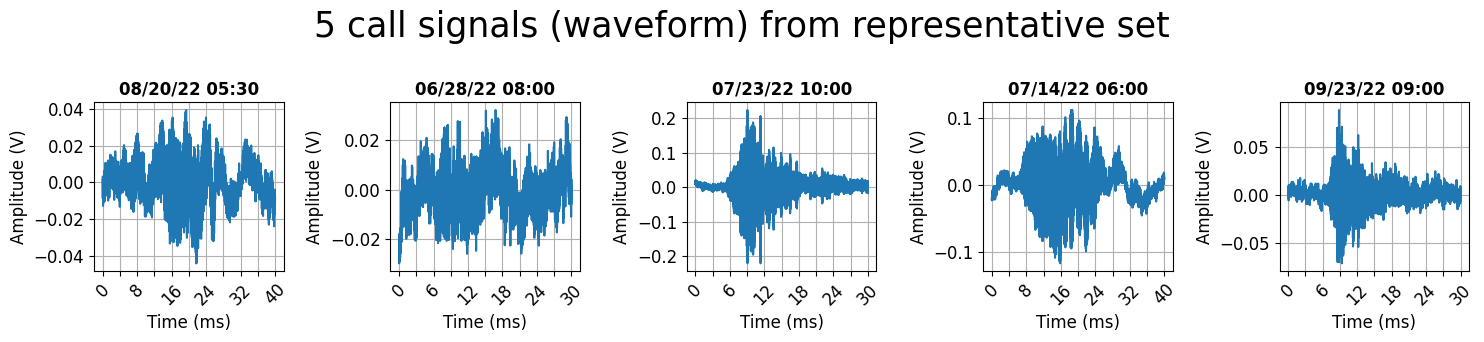

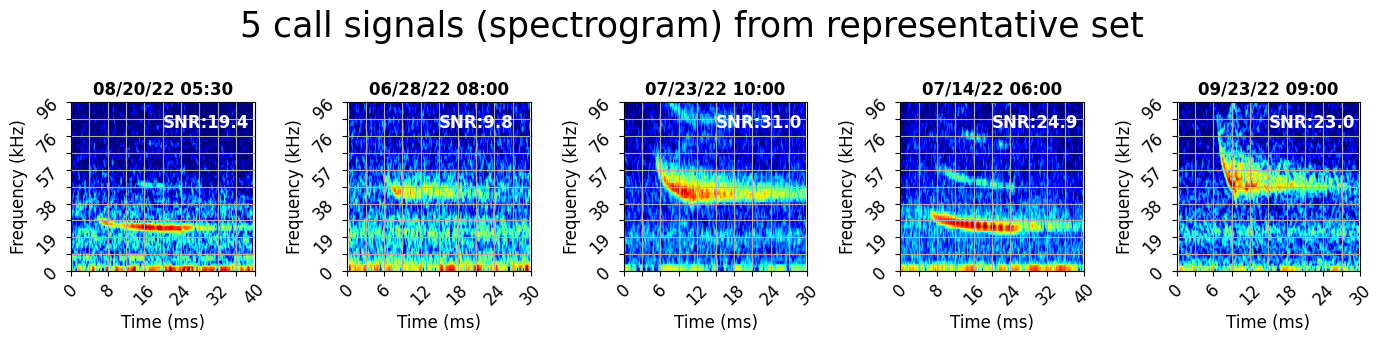

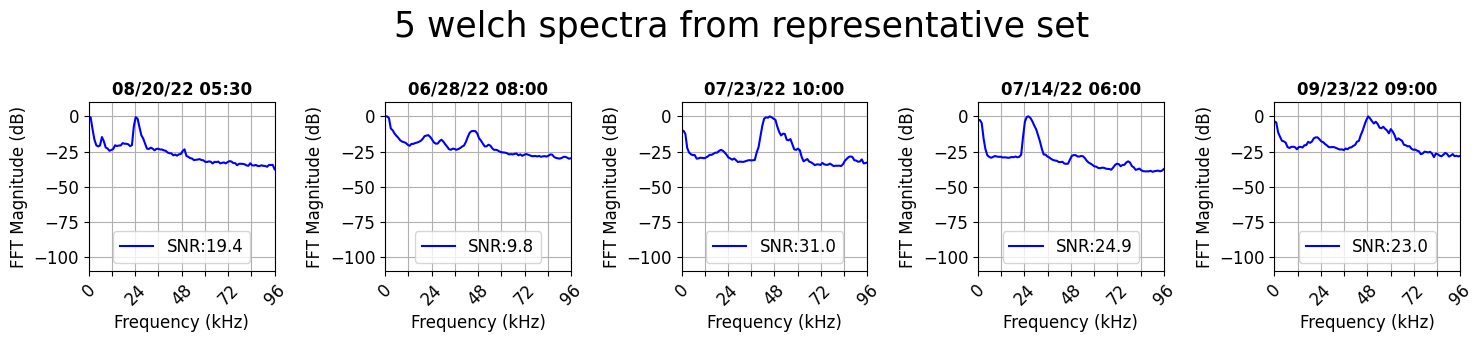

In [157]:
plot_n_calls(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_n_specs(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_n_welch(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)